# Task 1 Regression on Ames Housing Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore') #ignore all the warnings

In [2]:
data = pd.read_excel("AmesHousing.xls",header=0)

In [3]:
data.shape

(2930, 82)

The data has 82 features and 2930 samples.

In [4]:
pd.set_option('display.max_columns', None)
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
data.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2928.000000,2928.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2771.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,559.262547,1051.614544,1159.557679,335.455973,4.676792,1499.690444,0.431352,0.061134,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,1978.132443,1.766815,472.819734,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,439.494153,440.615067,391.890885,428.395715,46.310510,505.508887,0.524820,0.245254,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,25.528411,0.760566,215.046549,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,793.000000,876.250000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,466.000000,990.000000,1084.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,802.000000,1302.000000,1384.000000,703.750000,0.000000,1742.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

Here are the indexes of all the continuous and categorical variables in original data.

In [7]:
conti_index = [0,1,4,5,18,19,20,21,27,35,37,38,39,44,45,46,47,48,49,50,51,52,53,55,57,60,62,63,67,68,69,70,71,72,76,77,78]
cate_index = [2,3,6,7,8,9,10,11,12,13,14,15,16,17,22,23,24,25,26,28,29,30,31,32,33,34,36,40,41,42,43,54,56,58,59,61,64,65,66,73,74,75,79,80]


## 1.1

- 37 continuous variables:     
    Order	
    PID	
    Lot Frontage	
    Lot Area	
    Overall Qual	
    Overall Cond	
    Year Built	
    Year Remod/Add	
    Mas Vnr Area	
    BsmtFin SF 1	
    BsmtFin SF 2	
    Bsmt Unf SF	
    Total Bsmt SF	
    1st Flr SF	
    2nd Flr SF	
    Low Qual Fin SF	
    Gr Liv Area	
    Bsmt Full Bath	
    Bsmt Half Bath	
    Full Bath	
    Half Bath	
    Bedroom AbvGr	
    Kitchen AbvGr	
    TotRms AbvGrd	
    Fireplaces	
    Garage Yr Blt	
    Garage Cars	
    Garage Area	
    Wood Deck SF	
    Open Porch SF	
    Enclosed Porch	
    3Ssn Porch	
    Screen Porch	
    Pool Area	
    Misc Val	
    Mo Sold	
    Yr Sold	
- target      
    SalePrice

### the univariate distribution of each continuous

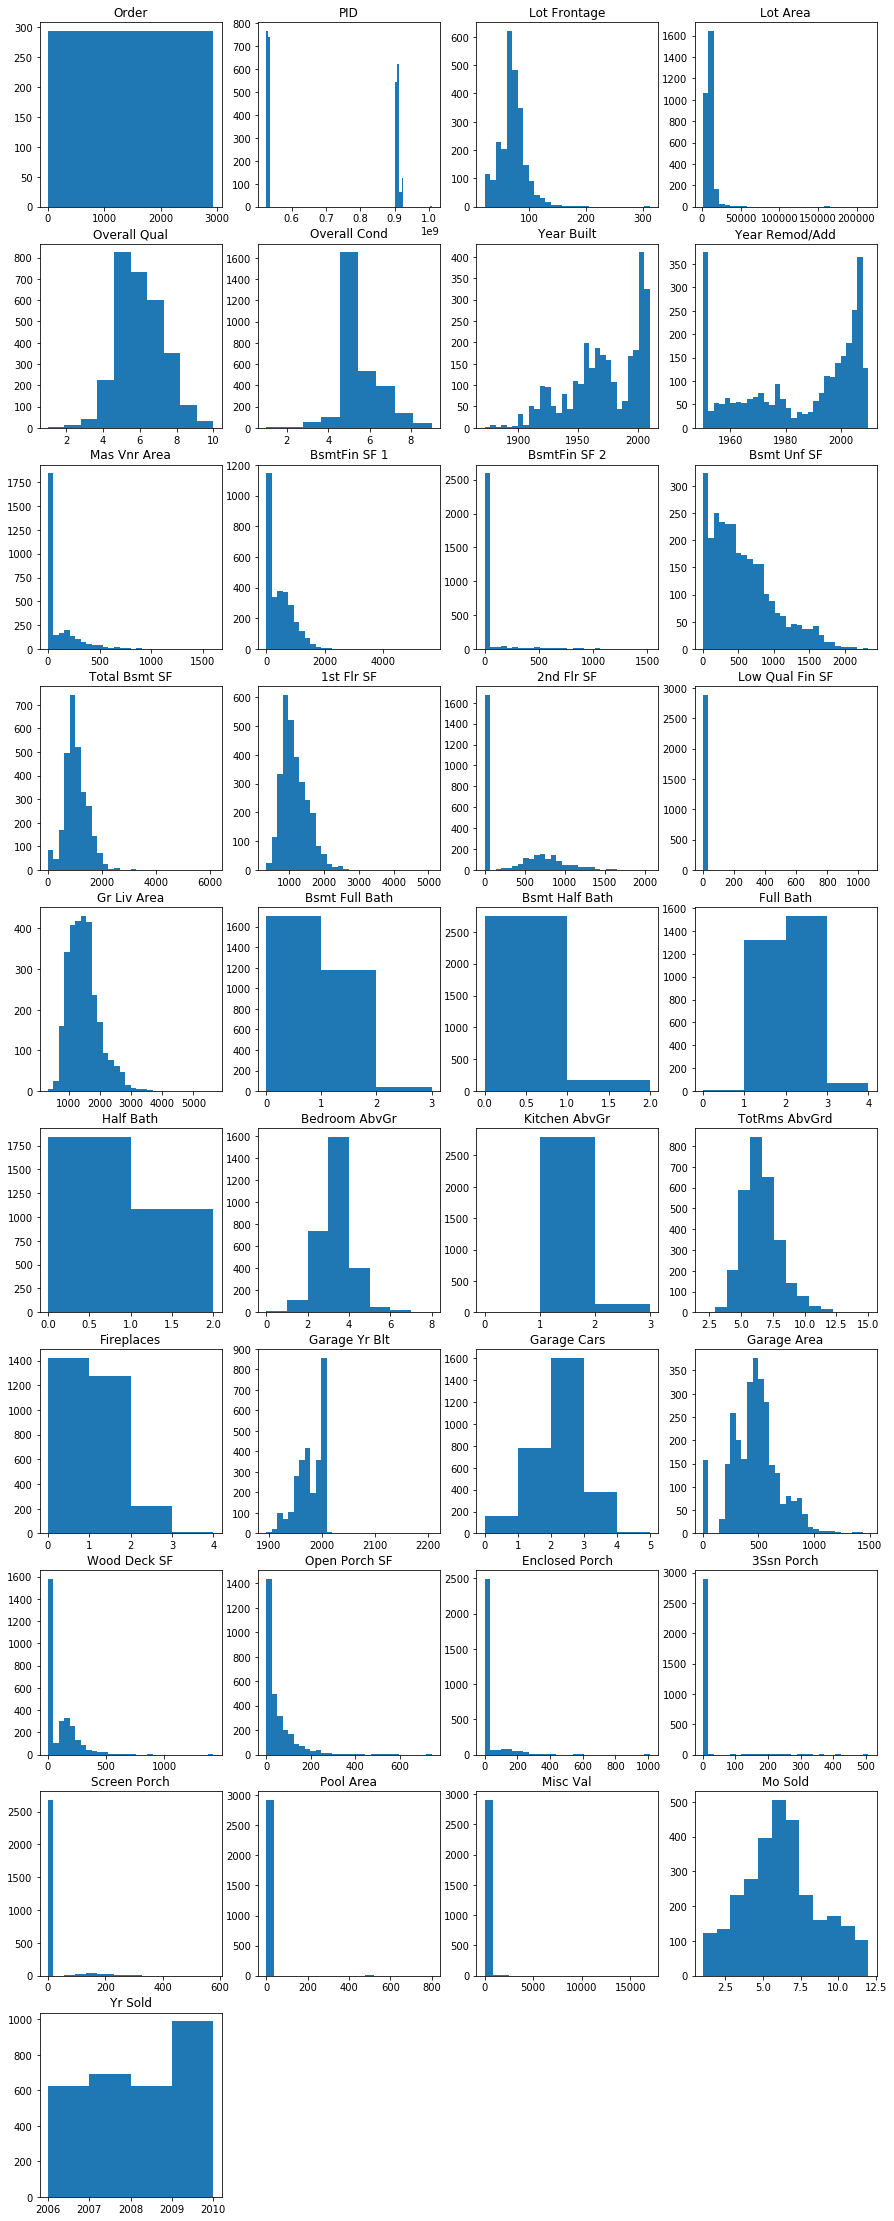

In [8]:
fig, axes = plt.subplots(10,4,figsize = (15,40))
axes[0,0].hist(data['Order'])
axes[0,0].set_title('Order')
axes[0,1].hist(data['PID'],bins = 100)
axes[0,1].set_title('PID')
axes[0,2].hist(data['Lot Frontage'].dropna(), bins = 30)
axes[0,2].set_title("Lot Frontage")
axes[0,3].hist(data["Lot Area"],bins = 30)
axes[0,3].set_title("Lot Area")
axes[1,0].hist(data["Overall Qual"],bins = 10)
axes[1,0].set_title("Overall Qual")
axes[1,1].hist(data["Overall Cond"],bins = 9)
axes[1,1].set_title("Overall Cond")
axes[1,2].hist(data["Year Built"],bins = 30)
axes[1,2].set_title("Year Built")
axes[1,3].hist(data["Year Remod/Add"],bins = 30)
axes[1,3].set_title("Year Remod/Add")
axes[2,0].hist(data["Mas Vnr Area"].dropna(),bins = 30)
axes[2,0].set_title("Mas Vnr Area")
axes[2,1].hist(data["BsmtFin SF 1"].dropna(),bins = 30)
axes[2,1].set_title("BsmtFin SF 1")
axes[2,2].hist(data["BsmtFin SF 2"].dropna(),bins = 30)
axes[2,2].set_title("BsmtFin SF 2")
axes[2,3].hist(data["Bsmt Unf SF"].dropna(),bins = 30)
axes[2,3].set_title("Bsmt Unf SF")
axes[3,0].hist(data["Total Bsmt SF"].dropna(),bins = 30)
axes[3,0].set_title("Total Bsmt SF")
axes[3,1].hist(data["1st Flr SF"],bins = 30)
axes[3,1].set_title("1st Flr SF")
axes[3,2].hist(data["2nd Flr SF"],bins = 30)
axes[3,2].set_title("2nd Flr SF")
axes[3,3].hist(data["Low Qual Fin SF"],bins = 30)
axes[3,3].set_title("Low Qual Fin SF")
axes[4,0].hist(data["Gr Liv Area"],bins = 30)
axes[4,0].set_title("Gr Liv Area")
axes[4,1].hist(data["Bsmt Full Bath"].dropna(),bins = 3)
axes[4,1].set_title("Bsmt Full Bath")
axes[4,2].hist(data["Bsmt Half Bath"].dropna(),bins = 2)
axes[4,2].set_title("Bsmt Half Bath")
axes[4,3].hist(data["Full Bath"],bins = 4)
axes[4,3].set_title("Full Bath")
axes[5,0].hist(data["Half Bath"],bins = 2)
axes[5,0].set_title("Half Bath")
axes[5,1].hist(data["Bedroom AbvGr"],bins = 8)
axes[5,1].set_title("Bedroom AbvGr")
axes[5,2].hist(data["Kitchen AbvGr"],bins = 3)
axes[5,2].set_title("Kitchen AbvGr")
axes[5,3].hist(data["TotRms AbvGrd"],bins = 14)
axes[5,3].set_title("TotRms AbvGrd")
axes[6,0].hist(data["Fireplaces"],bins = 4)
axes[6,0].set_title("Fireplaces")
axes[6,1].hist(data["Garage Yr Blt"].dropna(),bins = 30)
axes[6,1].set_title("Garage Yr Blt")
axes[6,2].hist(data["Garage Cars"].dropna(),bins = 5)
axes[6,2].set_title("Garage Cars")
axes[6,3].hist(data["Garage Area"].dropna(),bins = 30)
axes[6,3].set_title("Garage Area")
axes[7,0].hist(data["Wood Deck SF"].dropna(),bins = 30)
axes[7,0].set_title("Wood Deck SF")
axes[7,1].hist(data["Open Porch SF"],bins = 30)
axes[7,1].set_title("Open Porch SF")
axes[7,2].hist(data["Enclosed Porch"],bins = 30)
axes[7,2].set_title("Enclosed Porch")
axes[7,3].hist(data["3Ssn Porch"],bins = 30)
axes[7,3].set_title("3Ssn Porch")
axes[8,0].hist(data["Screen Porch"],bins = 30)
axes[8,0].set_title("Screen Porch")
axes[8,1].hist(data["Pool Area"],bins = 20)
axes[8,1].set_title("Pool Area")
axes[8,2].hist(data["Misc Val"],bins = 20)
axes[8,2].set_title("Misc Val")
axes[8,3].hist(data["Mo Sold"],bins = 12)
axes[8,3].set_title("Mo Sold")
axes[9,0].hist(data["Yr Sold"],bins = 4)
axes[9,0].set_title("Yr Sold")
axes[9,1].axis('off')
axes[9,2].axis('off')
_ = axes[9,3].axis('off')

### the distribution of the target

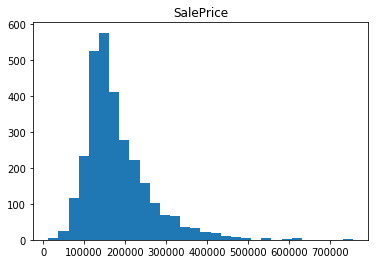

In [9]:
plt.hist(data["SalePrice"],bins = 30)
_ = plt.title("SalePrice")

I notice that there is missing data in some features. And there are outliers in some features. Besides, a lot of featues are not in the same scale.    
In addition, many variables are not normally distributed. Some of them are skewed.      
Thus, I think we should fill missing data, deal with outliers and scale the data.

## 1.2

### the dependency of the target on each continuous feature (2d scatter plot)

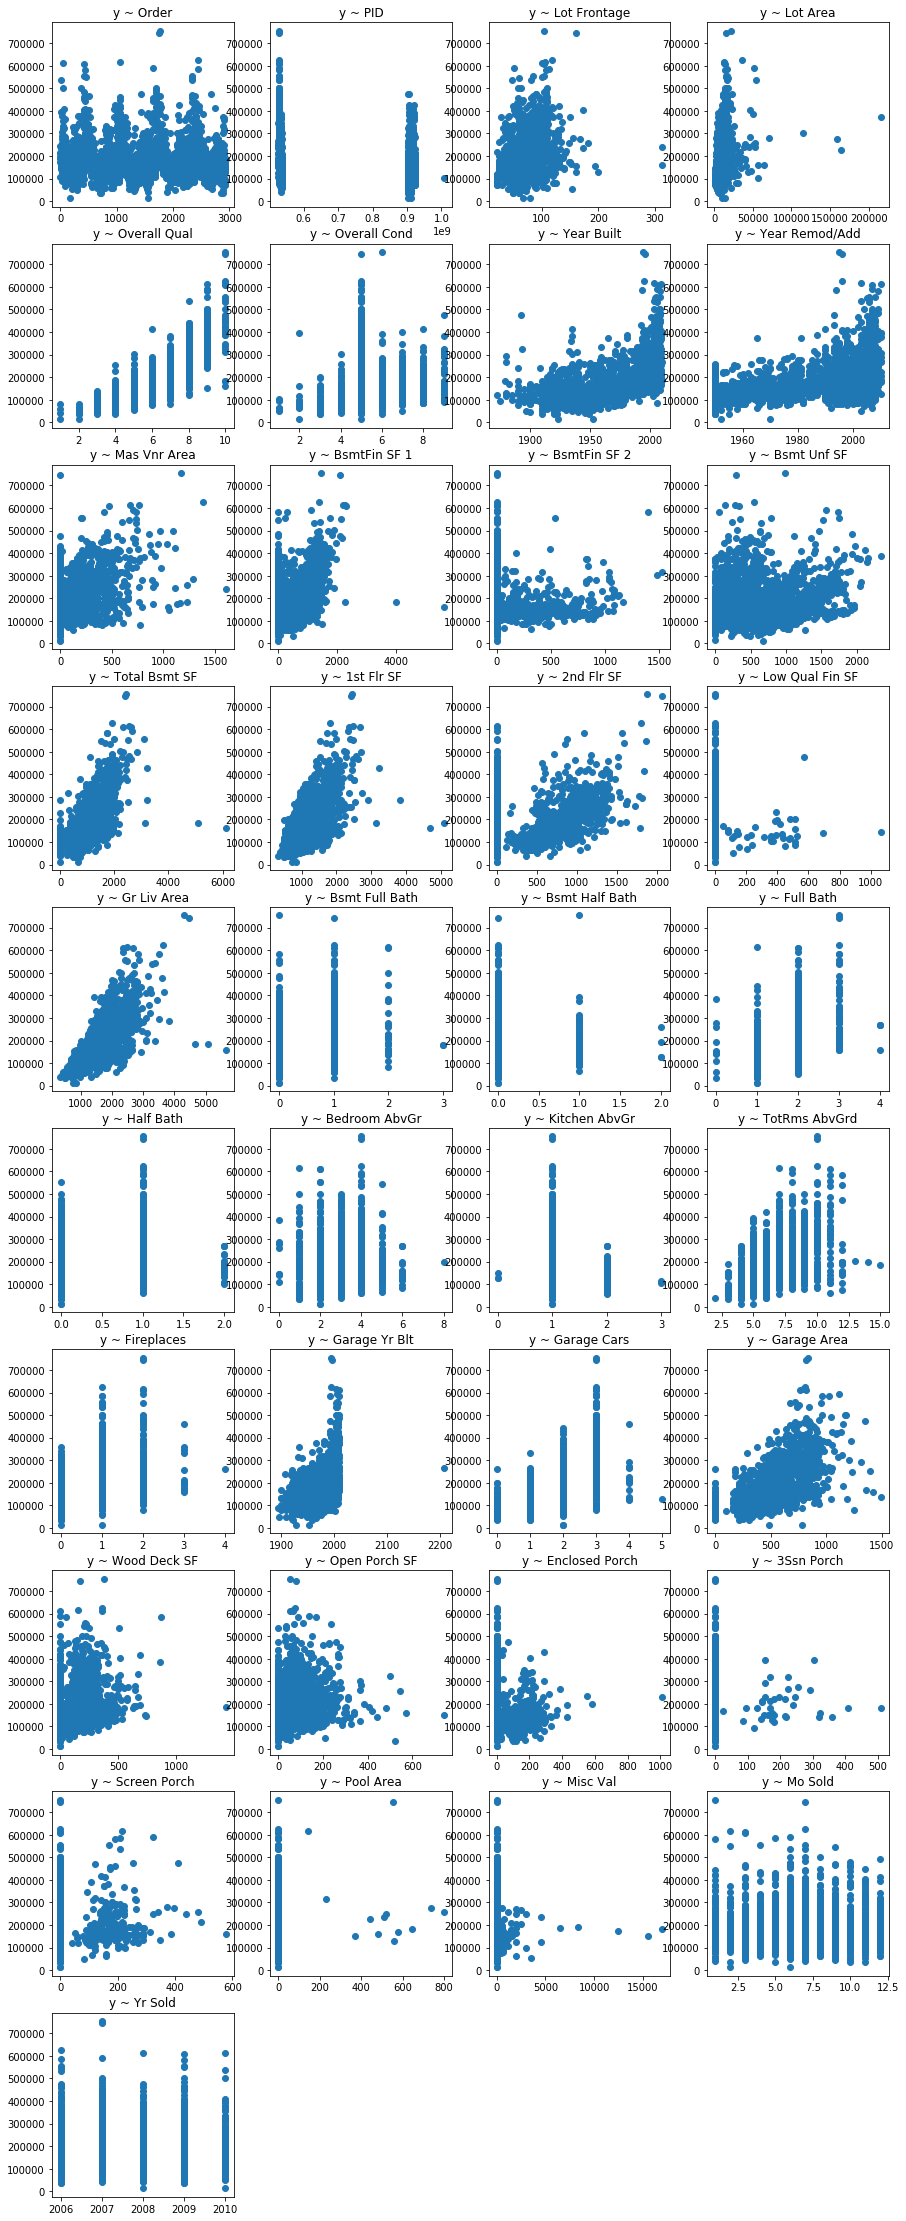

In [10]:
fig, axes = plt.subplots(10,4,figsize = (15,40))
y = data.iloc[:,-1]
i = 0
for m in range(0,10):
    for n in range(0,4):
        if i<len(conti_index):
            X = data.iloc[:,conti_index[i]]
            axes[m,n].scatter(X,y)
            axes[m,n].set_title("y ~ "+data.iloc[:,conti_index[i]].name)
            i = i+1
        else:
            axes[m,n].axis('off')

## 1.3

- 44 categorical variables:   
    MS SubClass	
    MS Zoning   
    Street   
    Alley   
    Lot Shape   
    Land Contour   
    Utilities   
    Lot Config   
    Land Slope     
    Neighborhood   
    Condition 1   
    Condition 2   
    Bldg Type   
    House Style   
    Roof Style   
    Roof Matl   
    Exterior 1st   
    Exterior 2nd   
    Mas Vnr Type   
    Exter Qual   
    Exter Cond   
    Foundation   
    Bsmt Qual   
    Bsmt Cond   
    Bsmt Exposure   
    BsmtFin Type 1    
    BsmtFin Type 2     
    Heating      
    Heating QC     
    Central Air     
    Electrical      
    Kitchen Qual       
    Functional        
    Fireplace Qu        
    Garage Type       
    Garage Finish      
    Garage Qual      
    Garage Cond      
    Paved Drive      
    Pool QC      
    Fence         
    Misc Feature        
    Sale Type         
    Sale Condition        

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

I found that Order and PID are all unique features, that is, they make no difference to prediction.     
So I will drop them.

In [14]:
for i in range(0,len(conti_index)):
    conti_index[i] = conti_index[i]-2
conti_index = conti_index[2:]

In [15]:
for i in range(0,len(cate_index)):
    cate_index[i] = cate_index[i]-2

In [16]:
#train test split
X = data.iloc[:,2:-1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42)

for all categorical variable, I change the dtype to object, otherwise when imputing the missing data, there will be error "'<' not supported between instances of 'str' and 'float'".     
In fact, most of the categorical variables are already object; I just need to change MS SubClass to object.

In [17]:
#change MS SubClass to object
X_train.iloc[:,0] = X_train.iloc[:,0].astype('object')

In [18]:
scores = {}
for i in cate_index:
    X_i = X_train.iloc[:,i]
    X_i = np.array(X_i)
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value= 'No')
    X_i = imp_mean.fit_transform(X_i.reshape(-1,1))
    ohe = OneHotEncoder().fit(X_i)   #if it is numerical data, for example, 1,3,5, onehotencoder will be 1,2,3,4,5, then it is better to use get_dummies
    X_ohe = ohe.transform(X_i.reshape(-1,1)).toarray()
    score = cross_val_score(LinearRegression(), X_ohe, y_train, cv=10,scoring = 'r2').mean()
    scores[X_train.iloc[:,i].name]= score
    

In [19]:
scores = pd.Series(scores)

In [20]:
scores.nlargest(3)

Bsmt Qual       0.487063
Exter Qual      0.481354
Kitchen Qual    0.459696
dtype: float64

So the three categorical variables that provide the best R^2 value are    
Bsmt Qual     
Exter Qual      
Kitchen Qual     

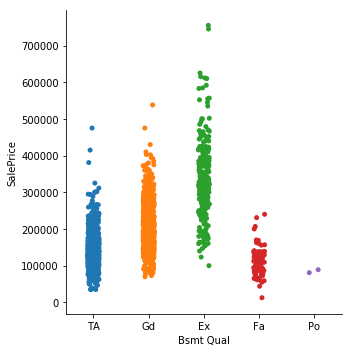

In [21]:
sns.catplot(x ='Bsmt Qual',y = 'SalePrice', data = data)

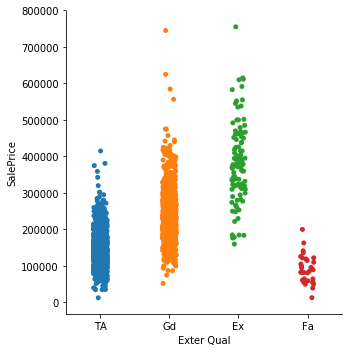

In [22]:
sns.catplot(x ='Exter Qual',y = 'SalePrice', data = data)

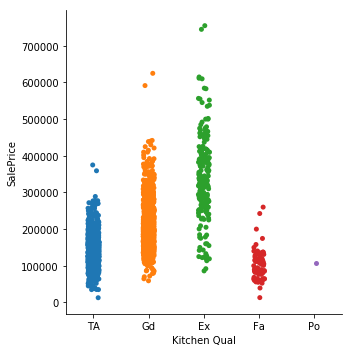

In [23]:
sns.catplot(x ='Kitchen Qual',y = 'SalePrice', data = data)

## 1.4

In this question, I use the default scoring in cross_val_score.

In [24]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [25]:
#select all the categorical variables as a series
categorical = []
for i in range(0,X_train.shape[1]):
    if i not in cate_index:
        categorical.append(False)
    else:
        categorical.append(True)
categorical = pd.Series(categorical, index=X_train.columns)

### Without scaling the data

In [26]:
score_noscale = {}
categorical_transfomer = Pipeline(steps = [('imputer',SimpleImputer(strategy = 'constant',fill_value = 'No')),('scaler',OneHotEncoder(handle_unknown = 'ignore'))])
preprocess = make_column_transformer((categorical_transfomer,categorical),(SimpleImputer(strategy = 'median'),~categorical))   #remainder = 'passthrough'
#Linear Regression
model = make_pipeline(preprocess,LinearRegression())
score_noscale['OLS'] = cross_val_score(model,X_train,y_train,cv=10).mean()
#Ridge regression
model = make_pipeline(preprocess,Ridge())
score_noscale['ridge'] = cross_val_score(model,X_train,y_train,cv=10).mean()
#Lasso regression
model = make_pipeline(preprocess,Lasso())
score_noscale['lasso'] = cross_val_score(model,X_train,y_train,cv=10).mean()
#ElasticNet
model = make_pipeline(preprocess,ElasticNet())
score_noscale['ElasticNet'] = cross_val_score(model,X_train,y_train,cv=10).mean()

### Scaling the data

In [27]:
from sklearn.pipeline import Pipeline
score_scaled = {}
continuous_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),('scaler', StandardScaler())])
preprocess = make_column_transformer((categorical_transfomer,categorical),(continuous_transformer,~categorical))


In [28]:
#Linear Regression
model = make_pipeline(preprocess,LinearRegression())
score_scaled['OLS'] = cross_val_score(model,X_train,y_train,cv=10).mean()
#Ridge regression
model = make_pipeline(preprocess,Ridge())
score_scaled['ridge'] = cross_val_score(model,X_train,y_train,cv=10).mean()
#Lasso regression
model = make_pipeline(preprocess,Lasso())
score_scaled['lasso'] = cross_val_score(model,X_train,y_train,cv=10).mean()
#ElasticNet
model = make_pipeline(preprocess,ElasticNet())
score_scaled['ElasticNet'] = cross_val_score(model,X_train,y_train,cv=10).mean()

Without StandardScaler:

In [29]:
score_noscale

{'OLS': 0.8442765495271578,
 'ridge': 0.6575960457591274,
 'lasso': 0.8414713470955902,
 'ElasticNet': 0.8246974800738698}

With StandardScaler:

In [30]:
score_scaled

{'OLS': 0.8320926186699685,
 'ridge': 0.8605504738812015,
 'lasso': 0.8415034645150323,
 'ElasticNet': 0.8321694609304426}

Compare the results, scaling the data with StandardScaler makes a great influence in ridge. But it seems that scaling data won't improve OLS, also little help for Lasso.

## 1.5

In [31]:
from sklearn.model_selection import GridSearchCV

**OLS**

I think there is no parameter need to be tuned in OLS.

**Ridge**

In [32]:
ridge_pipeline = make_pipeline(preprocess,Ridge())
param_grid = {'ridge__alpha':np.logspace(-3,3,13)} 
grid_ridge = GridSearchCV(ridge_pipeline,param_grid, cv = 10)
grid_ridge.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('columntransformer', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('pipeline-1', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value='No', missing_values=nan,
       strategy='co...it_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'ridge__alpha': array([1.00000e-03, 3.16228e-03, 1.00000e-02, 3.16228e-02, 1.00000e-01,
       3.16228e-01, 1.00000e+00, 3.16228e+00, 1.00000e+01, 3.16228e+01,
       1.00000e+02, 3.16228e+02, 1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [33]:
print(grid_ridge.best_params_)
print(grid_ridge.best_score_)

{'ridge__alpha': 10.0}
0.8647672155401726


For Ridge regression, the result improves a little. From 0.8605 to 0.8647.

In [34]:
res_ridge = pd.pivot_table(pd.DataFrame(grid_ridge.cv_results_),values= 'mean_test_score',index='param_ridge__alpha')


In [35]:
res_ridge

,mean_test_score
param_ridge__alpha,
0.001000,0.856691
0.003162,0.856719
0.010000,0.856746
0.031623,0.856884
0.100000,0.857262
0.316228,0.858335
1.000000,0.860497
3.162278,0.863188
10.000000,0.864767


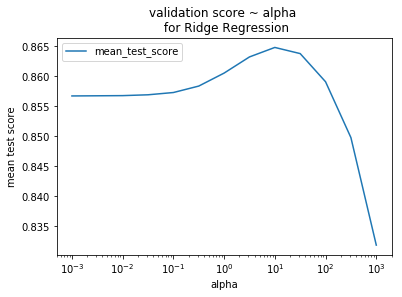

In [36]:
ax1 = sns.lineplot(data = res_ridge)
ax1.set_xscale('log')
ax1.set_title('validation score ~ alpha \n for Ridge Regression')
_ = plt.xlabel('alpha')
_ = plt.ylabel('mean test score')

**Lasso**

In [37]:
lasso_pipeline = make_pipeline(preprocess,Lasso())
param_grid = {'lasso__alpha':np.logspace(-3,3,13)}
grid_lasso = GridSearchCV(lasso_pipeline,param_grid, cv = 10)
grid_lasso.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('columntransformer', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('pipeline-1', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value='No', missing_values=nan,
       strategy='co...e=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'lasso__alpha': array([1.00000e-03, 3.16228e-03, 1.00000e-02, 3.16228e-02, 1.00000e-01,
       3.16228e-01, 1.00000e+00, 3.16228e+00, 1.00000e+01, 3.16228e+01,
       1.00000e+02, 3.16228e+02, 1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [38]:
print(grid_lasso.best_params_)
print(grid_lasso.best_score_)

{'lasso__alpha': 31.622776601683793}
0.8694230372345064


For Lasso, the result improves. From 0.84 to 0.86.

In [39]:
res_lasso = pd.pivot_table(pd.DataFrame(grid_lasso.cv_results_),values= 'mean_test_score',index='param_lasso__alpha')


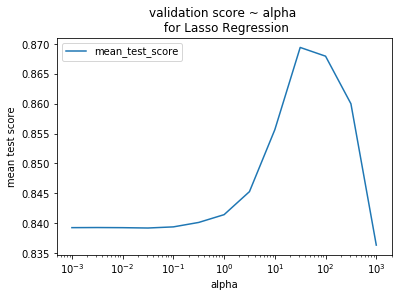

In [40]:
ax2 = sns.lineplot(data = res_lasso)
ax2.set_xscale('log')
ax2.set_title('validation score ~ alpha \n for Lasso Regression')
_ = plt.xlabel('alpha')
_ = plt.ylabel('mean test score')

**ElasticNet**

In [41]:
elasticnet_pipeline = make_pipeline(preprocess,ElasticNet())
param_grid = {'elasticnet__alpha': np.logspace(-3,3,13),'elasticnet__l1_ratio': [0.01, .1, .5, .9, .98, 1]}
grid_elasticnet = GridSearchCV(elasticnet_pipeline,param_grid, cv = 10)
grid_elasticnet.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('columntransformer', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('pipeline-1', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value='No', missing_values=nan,
       strategy='co...alse, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'elasticnet__alpha': array([1.00000e-03, 3.16228e-03, 1.00000e-02, 3.16228e-02, 1.00000e-01,
       3.16228e-01, 1.00000e+00, 3.16228e+00, 1.00000e+01, 3.16228e+01,
       1.00000e+02, 3.16228e+02, 1.00000e+03]), 'elasticnet__l1_ratio': [0.01, 0.1, 0.5, 0.9, 0.98, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [42]:
print(grid_elasticnet.best_params_)
print(grid_elasticnet.best_score_)

{'elasticnet__alpha': 31.622776601683793, 'elasticnet__l1_ratio': 1}
0.8694230372345064


For Elasticnet, the result improves from 0.83 to 0.86.

In [43]:
res_elasticnet = pd.pivot_table(pd.DataFrame(grid_elasticnet.cv_results_),values= 'mean_test_score',index='param_elasticnet__alpha', columns='param_elasticnet__l1_ratio')


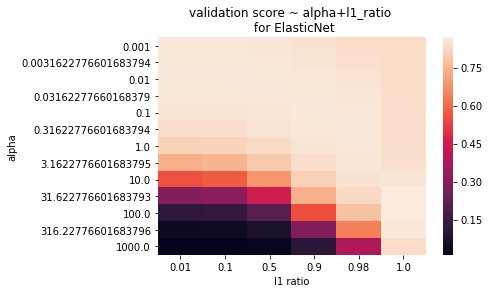

In [60]:
ax3 = sns.heatmap(res_elasticnet)
ax3.set_title('validation score ~ alpha+l1_ratio \n for ElasticNet')
_ = plt.xlabel('l1 ratio')
_ = plt.ylabel('alpha')

With GridSearchCV, the results of the three models are all improved.

## 1.6

### get all the feature names

In [45]:
temp = preprocess.fit_transform(X_train) #otherwise it will have error: Onehotencoder haven't fitted

In [46]:
conti_name = []
for i in conti_index:
    conti_name.append(X_train.iloc[:,i].name)

In [47]:
cate_name = preprocess.named_transformers_['pipeline-1'].named_steps['scaler'].get_feature_names()
cate_name = list(cate_name)

In [48]:
col_name = cate_name+conti_name

In [49]:
col_name = pd.Index(col_name)

### Ridge regression

In [50]:
ridge_coef = grid_ridge.best_estimator_.named_steps['ridge'].coef_
ridge_coef = pd.Series(ridge_coef,index=col_name)
ridge_top20 = abs(ridge_coef).nlargest(20)

In [51]:
ridge_top20.index

Index(['x15_ClyTile', 'x9_StoneBr', 'x9_NoRidge', 'x39_Ex', 'x15_WdShngl',
       'x39_Gd', 'x41_Gar2', 'x9_NridgHt', 'x41_Elev', 'x31_Ex', 'x9_GrnHill',
       'Gr Liv Area', 'x4_IR3', 'x16_BrkFace', 'x22_Ex', 'Overall Qual',
       'x9_Edwards', '2nd Flr SF', 'x9_Gilbert', 'x33_Ex'],
      dtype='object')

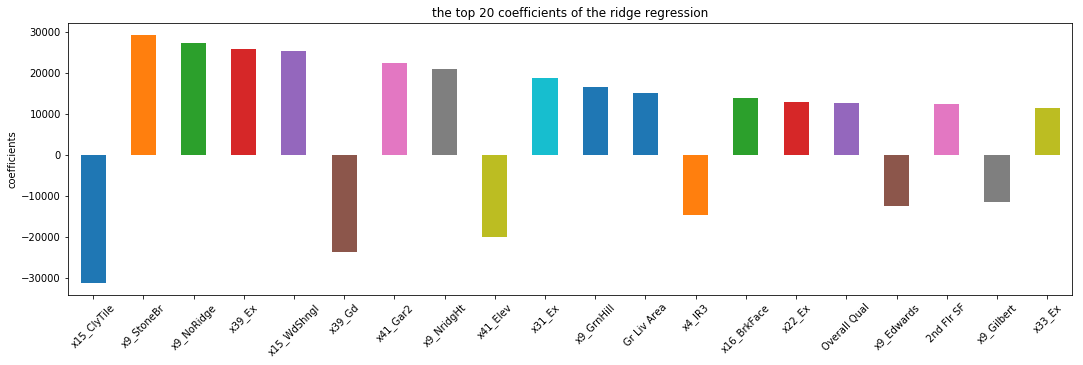

In [52]:
plt.figure(figsize=(18, 5))
ridge_coef.loc[ridge_top20.index].plot(kind = 'bar')
_ = plt.title('the top 20 coefficients of the ridge regression')
_ = plt.ylabel('coefficients')
_ = plt.xticks(rotation=45)

Cimbining the highest and lowest coefficients, these original features are important:     
- Roof Matl (ClyTile, WdShngl)
- Neighborhood  (StoneBr, NoRidge, NridgHt, GrnHill, Edwards, Gilbert)
- Pool QC (Ex, Gd)
- Misc Feature (Gar2, Elev)
- Kitchen Qual (Ex)  
- Bldg Type (1Fam)
- Gr Liv Area
- Exterior 1st (BrkFace)
- Lot Shape (IR3) 
- Overall Qual
- Bsmt Qual (Ex)
- 2nd Flr SF

### Lasso regression

In [53]:
lasso_coef = grid_lasso.best_estimator_.named_steps['lasso'].coef_
lasso_coef = pd.Series(lasso_coef,index=col_name)
lasso_top20 = abs(lasso_coef).nlargest(20)

In [54]:
lasso_top20.index

Index(['x15_ClyTile', 'x41_Elev', 'x39_Ex', 'x9_GrnHill', 'x15_WdShngl',
       'x9_StoneBr', 'x9_NoRidge', 'x31_Ex', 'x9_NridgHt', 'Gr Liv Area',
       'x19_Ex', 'x12_1Fam', 'x8_Sev', 'x22_Ex', 'x32_Maj1', 'x9_Crawfor',
       'x16_BrkFace', 'x24_Gd', 'x36_TA', 'x9_Somerst'],
      dtype='object')

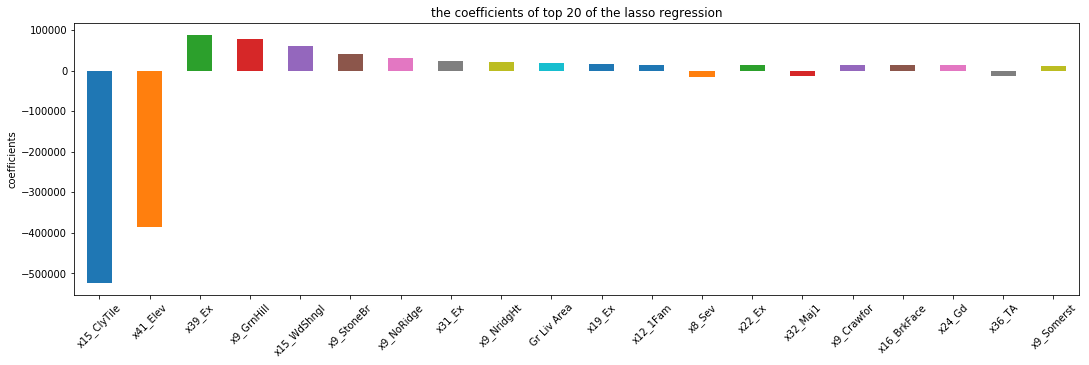

In [55]:
plt.figure(figsize=(18, 5))
lasso_coef.loc[lasso_top20.index].plot(kind = 'bar')
_ = plt.title('the coefficients of top 20 of the lasso regression')
_ = plt.ylabel('coefficients')
_ = plt.xticks(rotation=45)

Cimbining the highest and lowest coefficients, these original features are important:     
- Roof Matl (ClyTile, WdShngl)
- Misc Feature (Elev)
- Neighborhood  (GrnHill, StoneBr, NoRidge, NridgHt, Crawfor, Somerst)
- Pool QC (Ex)
- Gr Liv Area
- Kitchen Qual (Ex)  
- Exter Qual (Ex)
- Land Slope (Sev)
- Exterior 1st (BrkFace)
- Bldg Type (1Fam)
- Bsmt Qual (Ex)
- Functional (Maj1)
- Bsmt Exposure (Gd)
- Garage Qual(TA)

It is clear that most of the features are same with those of ridge, and there are some differences, too.

### Elasticnet

In [56]:
elasticnet_coef = grid_elasticnet.best_estimator_.named_steps['elasticnet'].coef_
elasticnet_coef = pd.Series(elasticnet_coef,index=col_name)
elasticnet_top20 = abs(elasticnet_coef).nlargest(20)

In [57]:
elasticnet_top20.index

Index(['x15_ClyTile', 'x41_Elev', 'x39_Ex', 'x9_GrnHill', 'x15_WdShngl',
       'x9_StoneBr', 'x9_NoRidge', 'x31_Ex', 'x9_NridgHt', 'Gr Liv Area',
       'x19_Ex', 'x12_1Fam', 'x8_Sev', 'x22_Ex', 'x32_Maj1', 'x9_Crawfor',
       'x16_BrkFace', 'x24_Gd', 'x36_TA', 'x9_Somerst'],
      dtype='object')

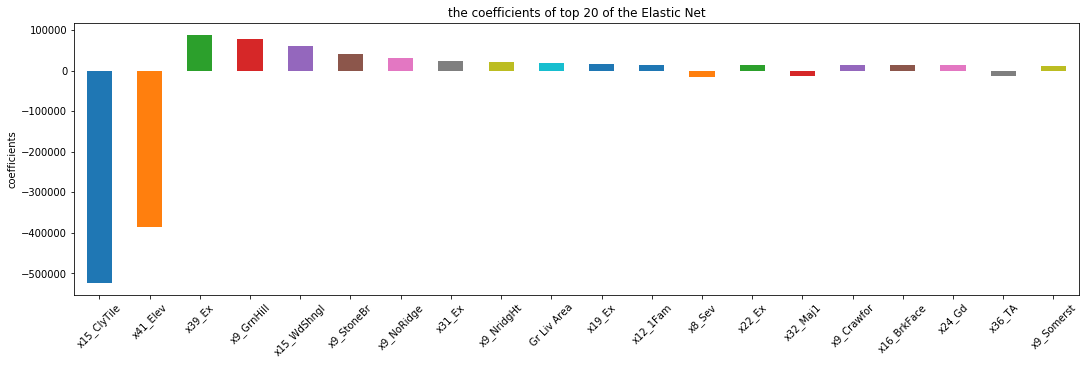

In [58]:
plt.figure(figsize=(18, 5))
elasticnet_coef.loc[elasticnet_top20.index].plot(kind = 'bar')
_ = plt.title('the coefficients of top 20 of the Elastic Net')
_ = plt.ylabel('coefficients')
_ = plt.xticks(rotation=45)

Cimbining the highest and lowest coefficients, these original features are important:     
- Roof Matl (ClyTile, WdShngl)
- Misc Feature (Elev)
- Neighborhood  (GrnHill, StoneBr, NoRidge, NridgHt, Crawfor, Somerst)
- Pool QC (Ex)
- Gr Liv Area
- Kitchen Qual (Ex)  
- Exter Qual (Ex)
- Land Slope (Sev)
- Exterior 1st (BrkFace)
- Bldg Type (1Fam)
- Bsmt Qual (Ex)
- Functional (Maj1)
- Bsmt Exposure (Gd)
- Garage Qual(TA)

The features are same with those of Lasso, since the best parameter of l1_ratio is 1, that is, is a lasso regression.

I agree with these features.     
First, they are consistent with the intuitions. For example, neighborhood will have a great influence on sale frice: the sale price in Manhattan will be much higher than that in Brooklyn.     
Secondly, according to the plots I drew in question 1.2, there are strong association between Overall qual and target as well as Gr liv Area and target, and they are the important features.    
Besides, in question 1.3, the top three categorical variables that provide the best R^2 value with the target through OLS are Bsmt Qual, Exter Qual, Kitchen Qual, and they are all important features.